In [1]:
import pandas as pd
import glob
pd.set_option('display.max_colwidth', None)

data_dir = 'evaluate/data'
file_paths = glob.glob(f'{data_dir}/*.xlsx')
df = pd.concat((pd.read_excel(file) for file in file_paths), ignore_index=True, axis=0)
df

,query,query_by,reference_contexts,reference_answer,reference_answer_by
0,Câu hỏi: Hãy nêu ba tiêu chuẩn chẩn đoán rối loạn phát triển trí tuệ.,"{'model_name': 'models/gemini-1.5-flash-002', 'type': 'ai'}","['Chỉsửdụng tài li ệu vào m ục đích h ọc tập và nghiên cứu\n31RỐI LOẠN PHÁT TRI ỂNTHẦN KINH\n1.1Rối loạn phát triển trí tuệ (Intellectual Disability)\nMã s ố: 319\nRối loạn phát tri ển trí tu ệlà một rối loạn khởi phát trong th ời kỳphát tri ển bao\ngồm suy gi ảm cảchức năng trí tuệvà ch ức năng thích ứng trong l ĩnh v ực nhận\nthức, xã h ội và th ực hành. Ph ải thỏa mãn 3 tiêu chu ẩn sau:\nA.Những suy gi ảm ch ức năng trí tu ệnhư l ập luận, gi ải quy ết vấn đề, lên k ế\nhoạch, tư duy tr ừu tượng, đánh giá, h ọc tập, học hỏi kinh nghi ệm, đư ợc khẳng\nđịnh bởi cảđánh giá lâm sà ng và test trí tu ệchuẩn.\nB. Suy gi ảm ch ức năng thích nghi d ẫn đến không phát tri ển đư ợc đầy đủtâm\nthần và xã h ội đểsống độc lập và thích nghi xã h ội. Nếu không có s ựhỗtrợ\nthường xuyên, kém thích ứng th ểhiện trong m ột hoặc nhi ều hoạt động thư ờng\nngày, như giao ti ếp, tham gia xã h ội và s ống ph ụthuộc trong nhi ều môi trư ờng\nnhưởnhà, trư ờng học, công vi ệc và giao ti ếp.\nC. Kh ởi phát c ủa suy gi ảm trí tu ệvà thích ứng trong th ời kỳphát tri ển.\n1.1.1Chẩn đoán phân bi ệt\n-Các r ối loạnthần kinh-nhận thứcchủyếu hoặc nhẹ.\n-Các r ối loạn giao ti ếp hoặc rối loạn hoạc biệt định.\n-Rối loạn phổtựkỉ.\n1.2Các r ối loạn giao tiếp\n1.2.1Rối loạn ngôn ng ữ(Language Disorder)\n1.2.2Mã s ố: 315.39 (F80.9)\nA. Khó khăn dai d ẳng tronghình thành và sửdụngsửdụng ngôn ng ữtrong các\nphương th ức (nói, vi ết, ngôn ng ữký hi ệu) dẫn đến suy gi ảmkhảnăng hi ểu hoặc\nnhững vấn đềdưới đây:\n1. Gi ảm vốn từ(hiểuvà sửdụngtừ).\n2. Hạn chếcấu trúc câu (khảnăng đ ặt câu đúng ng ữpháp).\n3. Làm h ỏng cu ộc nói chuy ện(khảnăng sửdụng từvà kết nối câu đ ểdiễn giải\nhoặc mô t ả1 chủđềhoặc một chu ỗi']","Ba tiêu chuẩn chẩn đoán rối loạn phát triển trí tuệ là:\n\nA. Suy giảm chức năng trí tuệ như lập luận, giải quyết vấn đề, lên kế hoạch, tư duy trừu tượng, đánh giá, học tập, học hỏi kinh nghiệm, được khẳng định bởi cả đánh giá lâm sàng và test trí tuệ chuẩn.\n\nB. Suy giảm chức năng thích ứng dẫn đến không phát triển được đầy đủ tâm thần và xã hội để sống độc lập và thích nghi xã hội. Nếu không có sự hỗ trợ thường xuyên, kém thích ứng thể hiện trong một hoặc nhiều hoạt động thường ngày, như giao tiếp, tham gia xã hội và sống phụ thuộc trong nhiều môi trường như nhà, trường học, công việc và giao tiếp.\n\nC. Khởi phát của suy giảm trí tuệ và thích ứng trong thời kỳ phát triển.\n","{'model_name': 'models/gemini-1.5-flash-002', 'type': 'ai'}"
1,Câu hỏi: Rối loạn phát âm được đặc trưng bởi những khó khăn nào trong việc giao tiếp?,"{'model_name': 'models/gemini-1.5-flash-002', 'type': 'ai'}","['Chỉsửdụng tài li ệu vào m ục đích h ọc tập và nghiên cứu\n4-Rối loạn phát tri ển trí tu ệ.\n-Các r ối loạn thần kinh.\n-Thoái tri ển ngôn ng ữ.\n1.2.3Rối loạn phát âm\n1.2.4Mã s ố: 315.39 (F80.0)\nA. Khó khăn dai d ẳng trong vi ệc phát âm c ản trởviệc hiểu lời nói ho ặckhógiao\ntiếp bằng ngôn ng ữ.\nB. Rối loạn làm h ạn chếhiệu quảgiao ti ếp, cản trởtham gia xã h ội, thành tích\nhọc tập hoặc hoạt đồng ngh ềnghiệp.\nCác tri ệu chứng kh ởi phát trong th ời kỳphát tri ển sớm.\nD. Nh ững khó khăn không do b ệnh bẩm sinh ho ặc mắc phải,như li ệt não, h ở\nhàm ếch, đi ếc, tổn thương ch ấn thương n ão ho ặc cácbệnh cơ th ểhay th ần kinh\nkhác.\nChẩn đoán phân bi ệt:\n-Các bi ến thểkhác nhau c ủa phát âm bình th ường.\n-Tổn thương thính giác ho ặc giác quan khác.\n-Khuy ết tật vềcấu trúc (ví d ụ, hởhàm ếch)\n1.2.5Rối loạn giao ti ếp xã h ội\nA. Khó khăn dai d ẳng trong giao ti ếp xã h ội dùng l ời và không dùng l ời biểu thị\nbởi tấtcảnhững đi ều sau:\n1. Suy gi ảm trong s ửdụng giao ti ếp chocácmục đích xã hội, như chào h ỏi và\nchia s ẻthông tin b ằng cách th ức phù h ợp với hoàn c ảnh xã h ội.\n2. Suy gi ảm kh ảnăng thay đ ổi giao ti ếp cho phù h ợp hoàn c ảnh ho ặc nhu c ầu\

In [2]:
df.drop(columns=['query_by', 'reference_answer_by'], inplace=True)

In [3]:
indices = df['query'].apply(lambda row: "một rối loạn tâm thần" in row)
df[indices]

,query,reference_contexts,reference_answer
12,Câu hỏi: Hãy mô tả những biểu hiện của giai đoạn hưng cảm trong một rối loạn tâm thần.,"['ngh ếch, hay “ng ớngẩn” là bình th ường trong nh ững\ndịp đặc biệt; tuy nhiên, n ếu những triệu chứng này l ặp lại và không phù h ợp với\nbối cảnh, và vư ợt quá nh ững gì được kì v ọng vềmức độphát tri ển của trẻthì có\nthểcoi như đ ạt tiêu chí A. N ếu sựvui v ẻlà bất thư ờng (khác v ới hàng ngày) và\nsựthay đ ổi khí s ắc cùng lúc v ới những tri ệu chứng khi đ ạt tiêu chí B v ềhưng\ncảm, thì s ựchắc chắn của chẩn đoán s ẽtăng; tuy nhiên s ựthay đ ổi khí s ắc phải\nđược đi kèm v ới mức độnăng lư ợng ho ặc hoạt động gia tăng dai d ẳng, bi ểu hiện\nrõ rệt với những ngư ời biết rõ tr ẻ.\nTrong giai đo ạn hưng c ảm, cá nhân có th ểtham gia vào nhi ều việc mới\nchồng lắp lên nhau. Các công vi ệc thư ờng đư ợc khởi xướng xu ống với rất ít ki ến\nthức vềchủđềcông vi ệc đó, nhưng có v ẻnhư không có g ì là v ượt quá t ầm tay\ncủa ngư ời đó. M ức độgia tăng ho ạt động có th ểbiểu hiện vào những th ời điểm\nbất thường trong ngày.\nSựtựtin bịthổi phồng là thư ờng th ấy, dao đ ộng từsựtựtin thi ếu suy xét,\nđến tựcao rõ r ệt, và có th ểtới mức hoang tư ởng (Tiêu chí B1). Cho dù không có\ntài năng hay kinh nghi ệm đặc biệt, ngư ời mắc hội chứng này v ẫn mu ốn ôm\nnhững vi ệc phức tạp, ch ẳng hạn như vi ết một cuốn tiểu thuy ết hoặc tìm cách\ncông b ốmột phát minh phi th ực tế. Hoang tư ởng tựcao (có m ối quan h ệđặc biệt']","Trong giai đoạn hưng cảm, cá nhân có thể tham gia vào nhiều việc mới chồng chéo lên nhau. Các công việc thường được khởi xướng xuống với rất ít kiến thức về chủ đề công việc đó, nhưng có vẻ như không có gì là vượt quá tầm tay của người đó. Mức độ gia tăng hoạt động có thể biểu hiện vào những thời điểm bất thường trong ngày. Sự tự tin bị thổi phồng là thường thấy, dao động từ sự tự tin thiếu suy xét, đến tự cao rõ rệt, và có thể tới mức hoang tưởng. Cho dù không có tài năng hay kinh nghiệm đặc biệt, người mắc hội chứng này vẫn muốn ôm những việc phức tạp, chẳng hạn như viết một cuốn tiểu thuyết hoặc tìm cách công bố một phát minh phi thực tế. Ngoài ra, sự vui vẻ bất thường (khác với hàng ngày) và sự thay đổi khí sắc cùng với những triệu chứng khi đạt tiêu chí B về hưng cảm cũng là những biểu hiện. Sự thay đổi khí sắc phải được đi kèm với mức độ năng lượng hoặc hoạt động gia tăng dai dẳng, biểu hiện rõ rệt với những người biết rõ trẻ (nếu là trẻ em).\n"
33,Câu hỏi: Làm thế nào các triệu chứng của một rối loạn tâm thần có thể được giải thích tốt hơn?,"['giải thích t ốt hơn b ởi các tri ệu chứng của một rối loạn\ntâm th ần khác (ví d ụ, các hoang tư ởng ho ặcảo giác xúc giác, nh ững nỗlực\nnhằm cải thiệt khuy ết tật cơ th ểtrong r ối loạn dịhình c ơ thể, các đ ộng tác r ập\nkhuôn trong r ối loạn vận động định hình, ho ặc ý đ ịnh tựgây t ổn thương trong\ntrong t ựgây t ổn thương không t ựsát).']","Các triệu chứng của một rối loạn tâm thần có thể được giải thích tốt hơn bởi các triệu chứng của một rối loạn tâm thần khác. Ví dụ, hoang tưởng hoặc ảo giác xúc giác, nỗ lực cải thiện khuyết tật cơ thể trong rối loạn dị hình cơ thể, các động tác lập khuôn trong rối loạn vận động định hình, hoặc ý định tự gây tổn thương trong tự gây tổn thương không tự sát.\n"
107,Câu hỏi: Hãy mô tả các triệu chứng của một rối loạn tâm thần cấp tính.,"['44 \n Thay đổi cảm xúc: ho ảng hốt, lo âu. B ệnh tiến triển nặng dần, nhất là về chiều tối, \ncó thể có ảo tưởng thị giác, hồi ức… \na. Giai đo ạn toàn phát: \nÝ thức mê sảng hoặc lú lẫn; Các ảo tưởng và ảo giác sinh đ ộng, triệu chứng run \nnặng. Thường có hoang tư ởng, kích động, mất ngủ… \nRối loạn năng lực định hướng thời gian và không gian, đ ịnh hướng xung quanh có \nthể lệch lạc. Mức độ mù mờ ý thức thường nặng lên về chiều tối. \nCác ảo giác như: ảo thị, ảo thanh, ảo giác xúc giác… \nHoang tưởng cũng r ất thường gặp và thường là các hoang tư ởng cảm thụ. \nCó thể có kích động, rối loạn giấc ngủ… \nCác rối loạn toàn thân rõ r ệt: run chân tay; run lư ỡi; vã mồ 

In [4]:
df.drop(df[indices].index, inplace=True)

## Remove prefix

In [5]:
df['query'] = df['query'].apply(lambda row: row.split("Câu hỏi: ")[1])

## Convert a list-like string to string

In [6]:
df['reference_contexts'] = df['reference_contexts'].apply(lambda row: eval(row)[0])

## Drop NA

In [7]:
len_bf = len(df)

In [8]:
print("Length data before removing NA: ", len(df))
df.dropna(inplace=True)
print("Length data after removing NA: ", len(df))

Length data before removing NA:  303
Length data after removing NA:  303


## Drop duplicates

In [9]:
print("Length data before removing duplicates: ", len(df))
df.drop_duplicates(subset=['query'], inplace=True)
print("Length data after removing duplicates: ", len(df))

Length data before removing duplicates:  303
Length data after removing duplicates:  282


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
# from wordcloud import WordCloud
import numpy as np

# Giả định rằng bạn đã load dataset vào biến `df`
# df = pd.read_csv('your_dataset.csv')


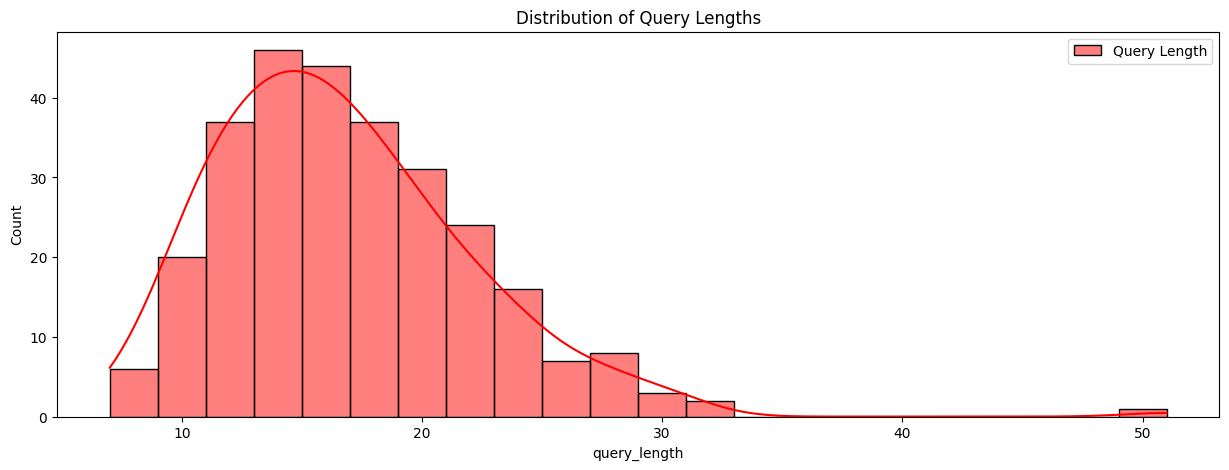

In [11]:
# Thêm cột độ dài cho mỗi phần
df['query_length'] = df['query'].apply(lambda x: len(x.split()))
# df['context_length'] = df['reference_contexts'].apply(lambda x: len(x.split()))
df['answer_length'] = df['reference_answer'].apply(lambda x: len(x.split()))

# Biểu đồ phân phối độ dài
plt.figure(figsize=(15, 5))
sns.histplot(df['query_length'], color='red', kde=True, label="Query Length")
# sns.histplot(df['context_length'], color='orange', kde=True, label="Context Length")
# sns.histplot(df['answer_length'], color='blue', kde=True, label="Answer Length")
plt.legend()
plt.title("Distribution of Query Lengths")
plt.show()


In [12]:
df = df[df['query_length'] < 40]

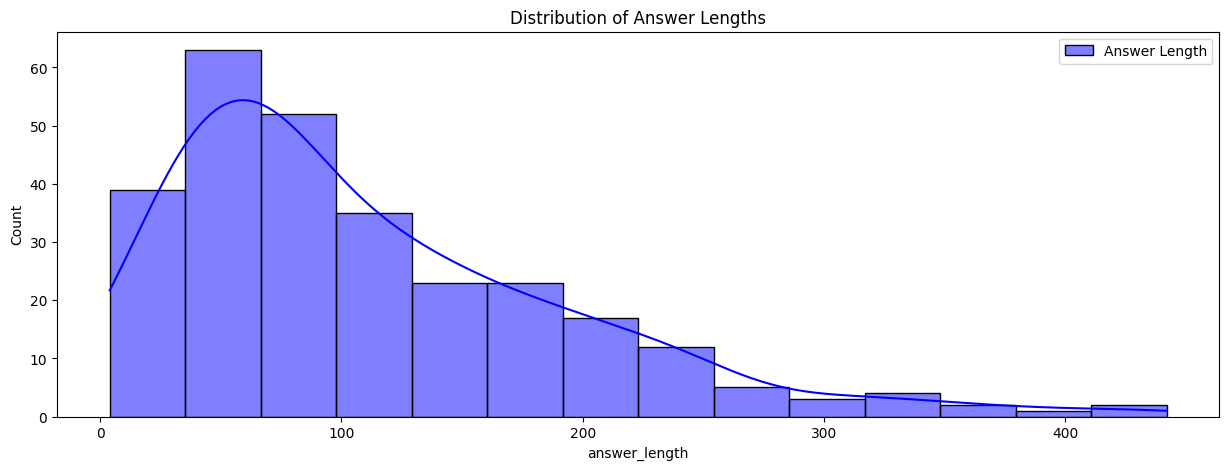

In [13]:
plt.figure(figsize=(15, 5))
sns.histplot(df['answer_length'], color='blue', kde=True, label="Answer Length")
plt.legend()
plt.title("Distribution of Answer Lengths")
plt.show()

In [14]:
df = df[df['answer_length'] < 300]

In [15]:
len_at = len(df)

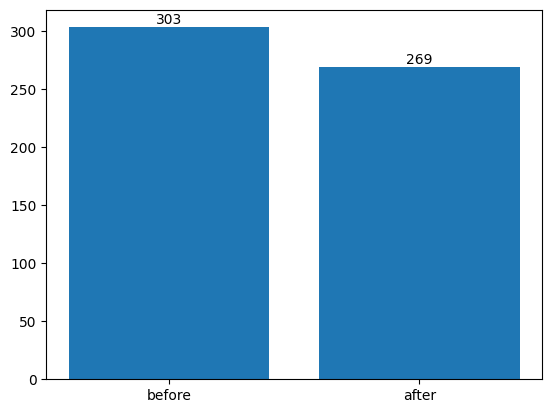

In [16]:
plt.bar(['before', 'after'], [len_bf, len_at])
for i, value in enumerate([len_bf, len_at]):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

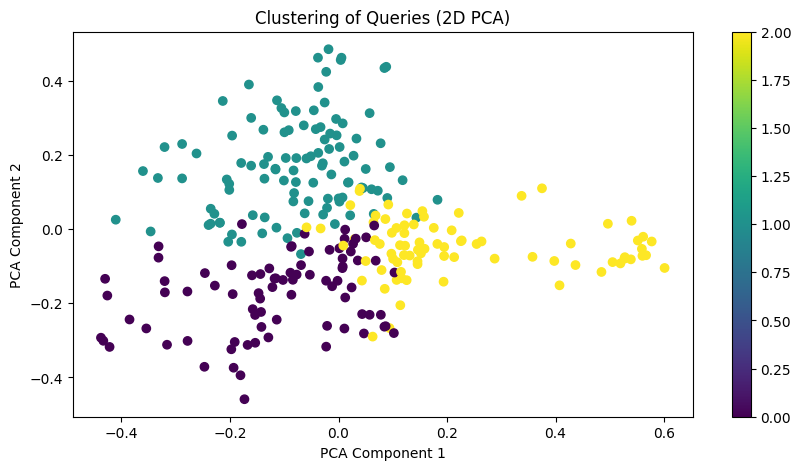

In [17]:
# Sử dụng TF-IDF để biểu diễn `query` thành vector
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['query'])

# Áp dụng PCA để giảm số chiều (để có thể vẽ biểu đồ)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Phân cụm với K-means
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit_predict(X.toarray())

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.title("Clustering of Queries (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [19]:
# Thêm nhãn cụm vào DataFrame
df['cluster'] = labels

# Chọn ngẫu nhiên vài câu hỏi từ mỗi cụm
sample_size = 5  # Số lượng câu hỏi bạn muốn lấy mẫu từ mỗi cụm
for cluster in range(num_clusters):
    cluster_df = df[df['cluster'] == cluster]
    sampled_queries = cluster_df['query'].sample(n=sample_size, random_state=42)
    print(f"Các câu hỏi ngẫu nhiên từ cụm {cluster}:")
    for query in sampled_queries:
        print(f"- {query}")
    print("\n")

Các câu hỏi ngẫu nhiên từ cụm 0:
-  Nêu những điểm khác biệt chính giữa rối loạn nhân cách tự yêu mình và các rối loạn nhân cách ranh giới, kịch tính và chống xã hội.
-  Hãy giải thích khái niệm hoang tưởng và phân biệt giữa hoang tưởng kì quái và hoang tưởng không kì quái.
-  Hãy giải thích khái niệm rối loạn thần kinh-nhận thức.
-  Nêu sự khác biệt chính giữa rối loạn nhân cách né tránh và rối loạn nhân cách phụ thuộc.
-  Hãy mô tả các triệu chứng chính của một chứng rối loạn giấc ngủ.


Các câu hỏi ngẫu nhiên từ cụm 1:
-  Liệt kê các tiêu chuẩn chẩn đoán rối loạn đái dầm.
-  Nêu các tiêu chí chẩn đoán một tình trạng liên quan đến rối loạn hô hấp trong giấc ngủ.
- Liệt kê ít nhất ba triệu chứng cần thiết để chẩn đoán một tình trạng nhất định.
-  Trình bày các yếu tố cần được xem xét khi thiết lập kế hoạch điều trị cho bệnh nhân chậm phát triển tâm thần.
-  Liệt kê các phương pháp chẩn đoán thường được sử dụng để xác định chậm phát triển tâm thần.


Các câu hỏi ngẫu nhiên từ cụm 2:
- 